# Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from math import ceil, floor
%matplotlib inline

locale.setlocale(locale.LC_ALL, 'es_VE.UTF-8')

df = pd.read_csv('output.csv', sep=', ')

def plot_algorithms(df, values, variable, y, title, ylabel, logarithmic=False, zoom=False):
    _, axs = plt.subplots(1, len(values), figsize=(len(values)**2, len(values)))

    for i, value in enumerate(values):
        df_var = df[df[variable] == value]
        df_var = df_var.sort_values('Algorithm')
        results = df_var.groupby('Algorithm')[y].mean().reset_index()

        

        ax = sns.barplot(x='Algorithm', y=y, data=results, ax=axs[i])
        ax.set_title(title + ' ' + locale.format_string("%d", value, grouping=True))
        ax.set_xlabel('Algoritmo')
        ax.set_ylabel(ylabel)
        ax.set_xticks(range(len(results['Algorithm'])))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        # Change the color of DP algorithm
        if df_var['Algorithm'].str.contains('DP').any():
            ax.patches[0].set_facecolor('g')

        if logarithmic:
            ax.set_yscale('log')

        if zoom:
            ax.set_ylim([floor(df_var[y].min()), ceil(df_var[y].max())])

    plt.tight_layout()
    plt.show()

In [2]:
df.head()

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
0,knapPI_1_1000_10000_100,KNAPSACK_HEURISTICS,uncorrelated,1000,4881651,4961864,4942158,19706,22
1,knapPI_1_10000_10000_100,KNAPSACK_HEURISTICS,uncorrelated,10000,49805376,50106947,49886890,220057,42
2,knapPI_1_1000_10000_100,KNAPSACK_LOCAL_SEARCH_FLIP,uncorrelated,1000,4881651,4961864,4909737,52127,332
3,knapPI_1_10000_10000_100,KNAPSACK_GENETIC,uncorrelated,10000,49805376,50106947,49752030,354917,7728
4,knapPI_4_1000_10000_100,KNAPSACK_HEURISTICS,inverse strongly correlated,1000,5778453,4825591,4786487,39104,45


In [3]:
df[df['Obtained'] == -1]

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
33,knapPI_1_10000_10000_100,KNAPSACK_ITERATIVE_LOCAL_SEARCH,uncorrelated,10000,49805376,50106947,-1,50106948,9223372036854775807
34,knapPI_1_10000_10000_100,KNAPSACK_TABU_SEARCH,uncorrelated,10000,49805376,50106947,-1,50106948,9223372036854775807
35,knapPI_1_1000_10000_100,KNAPSACK_ITERATIVE_LOCAL_SEARCH,uncorrelated,1000,4881651,4961864,-1,4961865,9223372036854775807
36,knapPI_1_10000_10000_100,KNAPSACK_DP,uncorrelated,10000,49805376,50106947,-1,50106948,9223372036854775807
41,knapPI_4_1000_10000_100,KNAPSACK_ITERATIVE_LOCAL_SEARCH,inverse strongly correlated,1000,5778453,4825591,-1,4825592,9223372036854775807
61,knapPI_4_5000_10000_100,KNAPSACK_DP,inverse strongly correlated,5000,29593067,24833067,-1,24833068,9223372036854775807
64,knapPI_4_5000_10000_100,KNAPSACK_ITERATIVE_LOCAL_SEARCH,inverse strongly correlated,5000,29593067,24833067,-1,24833068,9223372036854775807
69,knapPI_4_5000_10000_100,KNAPSACK_TABU_SEARCH,inverse strongly correlated,5000,29593067,24833067,-1,24833068,9223372036854775807
77,knapPI_4_500_10000_100,KNAPSACK_ITERATIVE_LOCAL_SEARCH,inverse strongly correlated,500,2868323,2391321,-1,2391322,9223372036854775807
82,knapPI_5_10000_10000_100,KNAPSACK_DP,almost strongly correlated,10000,49805376,59755517,-1,59755518,9223372036854775807


In [4]:
df = df[df['Obtained'] != -1]

In [5]:
df['Accuracy (%)'] = df['Obtained'] / df['Expected'] * 100

In [18]:
df['Algorithm'] = df['Algorithm'].str.replace('KNAPSACK_', '')

# Analisis por numero de items

In [19]:
sizes = np.sort(df['Size'].unique())

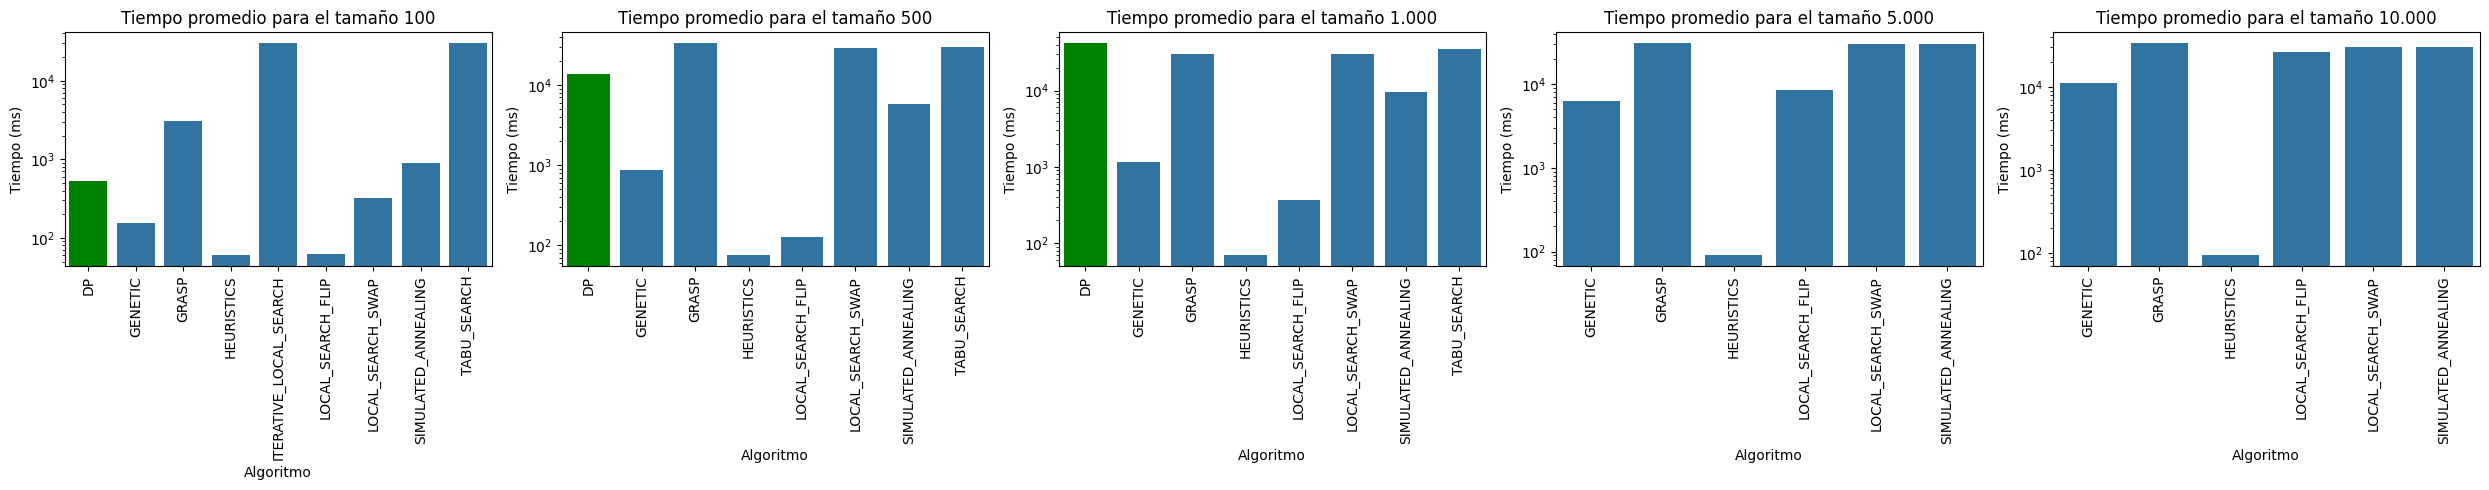

In [20]:
plot_algorithms(df, sizes, 'Size', 'Time (ms)', 'Tiempo promedio para el tamaño', 'Tiempo (ms)', logarithmic=True)

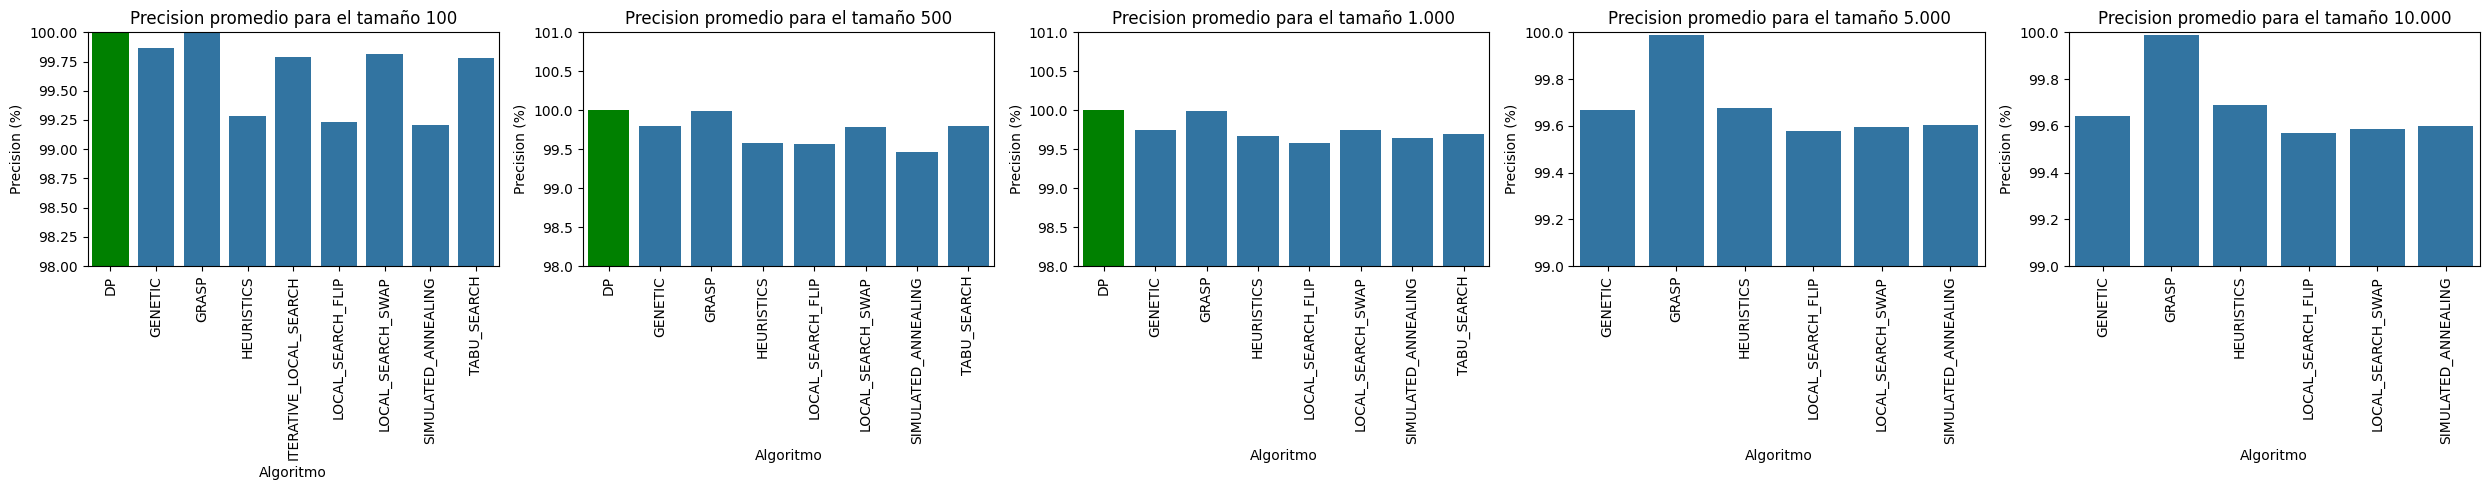

In [21]:
plot_algorithms(df, sizes, 'Size', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True)

In [22]:
(df[df['Algorithm'] == 'KNAPSACK_GRASP']['Obtained'] / df[df['Algorithm'] == 'KNAPSACK_GRASP']['Expected'] * 100).mean()

nan

# Analisis por capacidad de la mochila

In [23]:
sorted_capacity = np.sort(df['Capacity'].unique())
capacities1 = sorted_capacity[:len(sorted_capacity)//3]
capacities2 = sorted_capacity[len(sorted_capacity)//3:2*len(sorted_capacity)//3]
capacities3 = sorted_capacity[2*len(sorted_capacity)//3:]

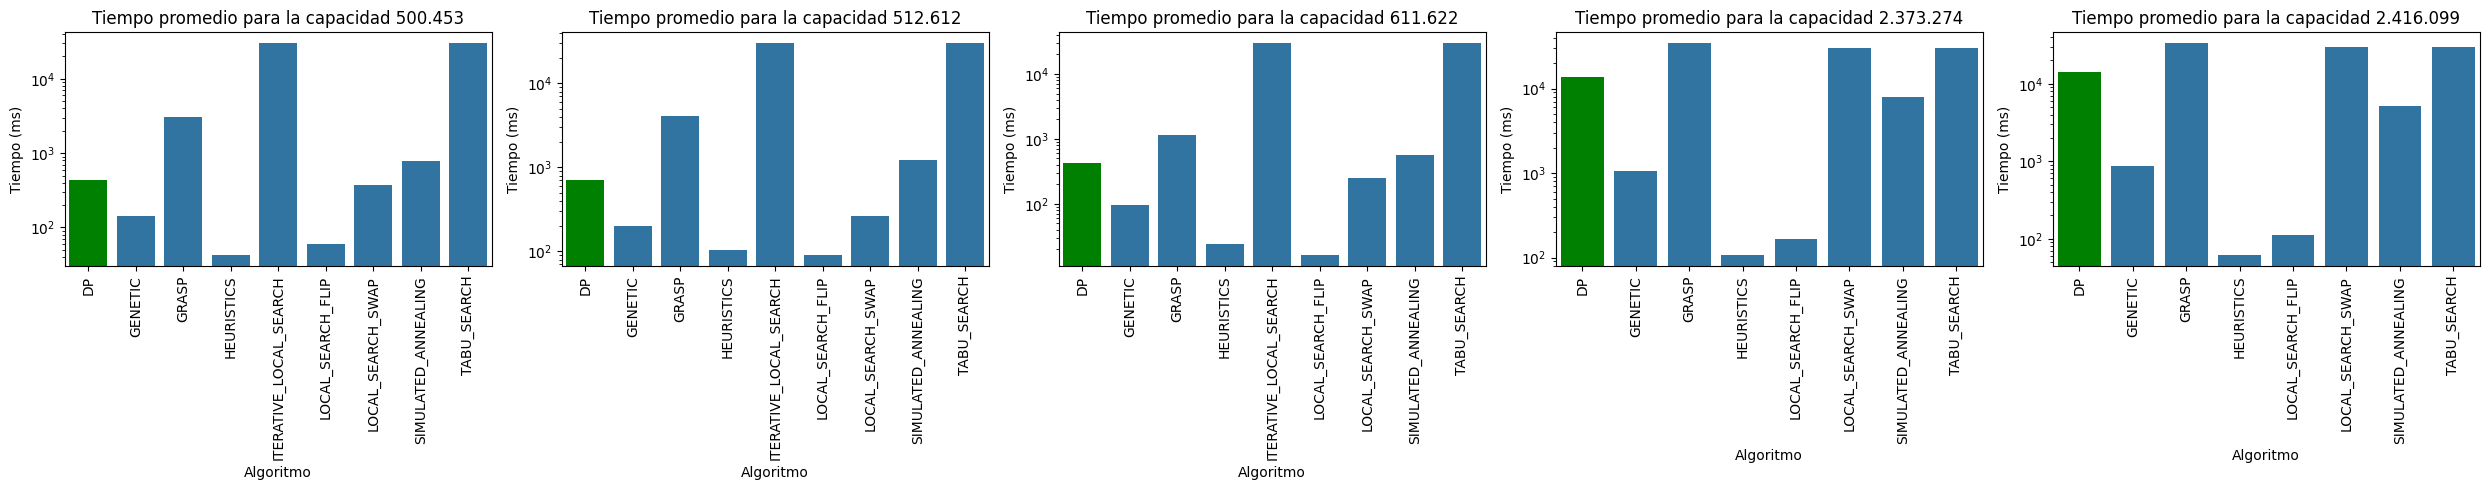

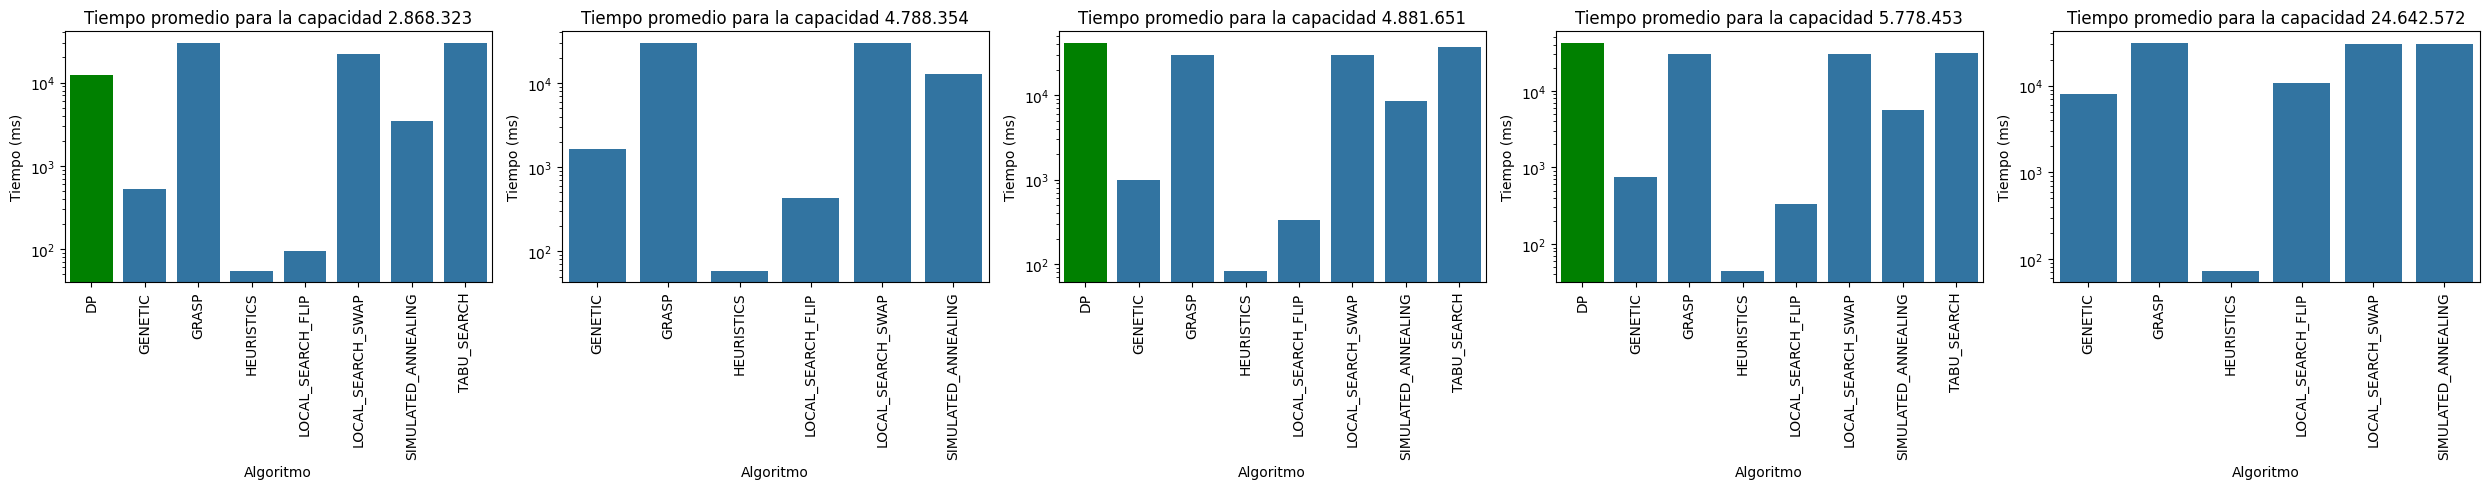

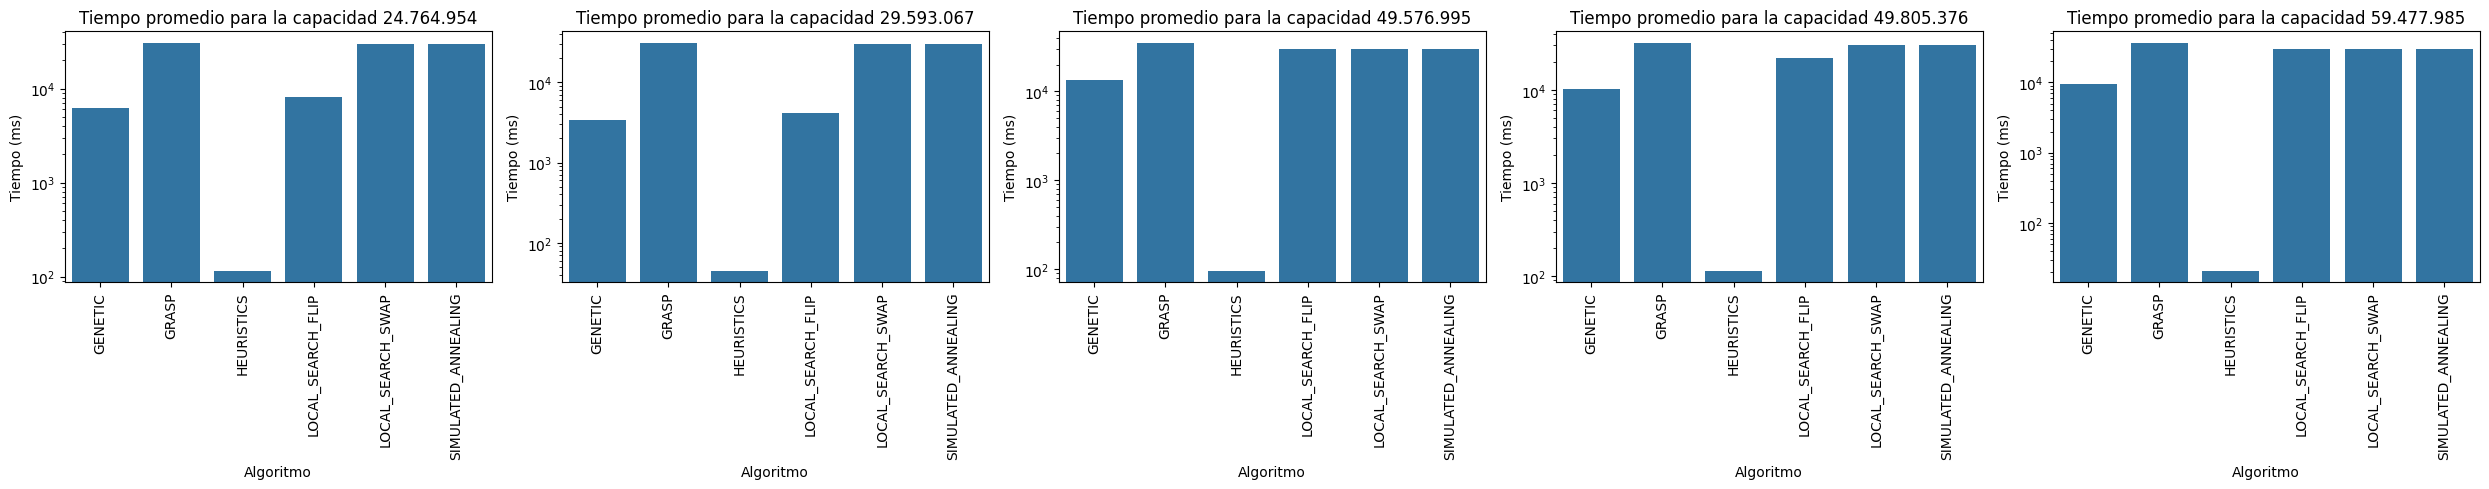

In [24]:
plot_algorithms(df, capacities1, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)
plot_algorithms(df, capacities2, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)
plot_algorithms(df, capacities3, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)

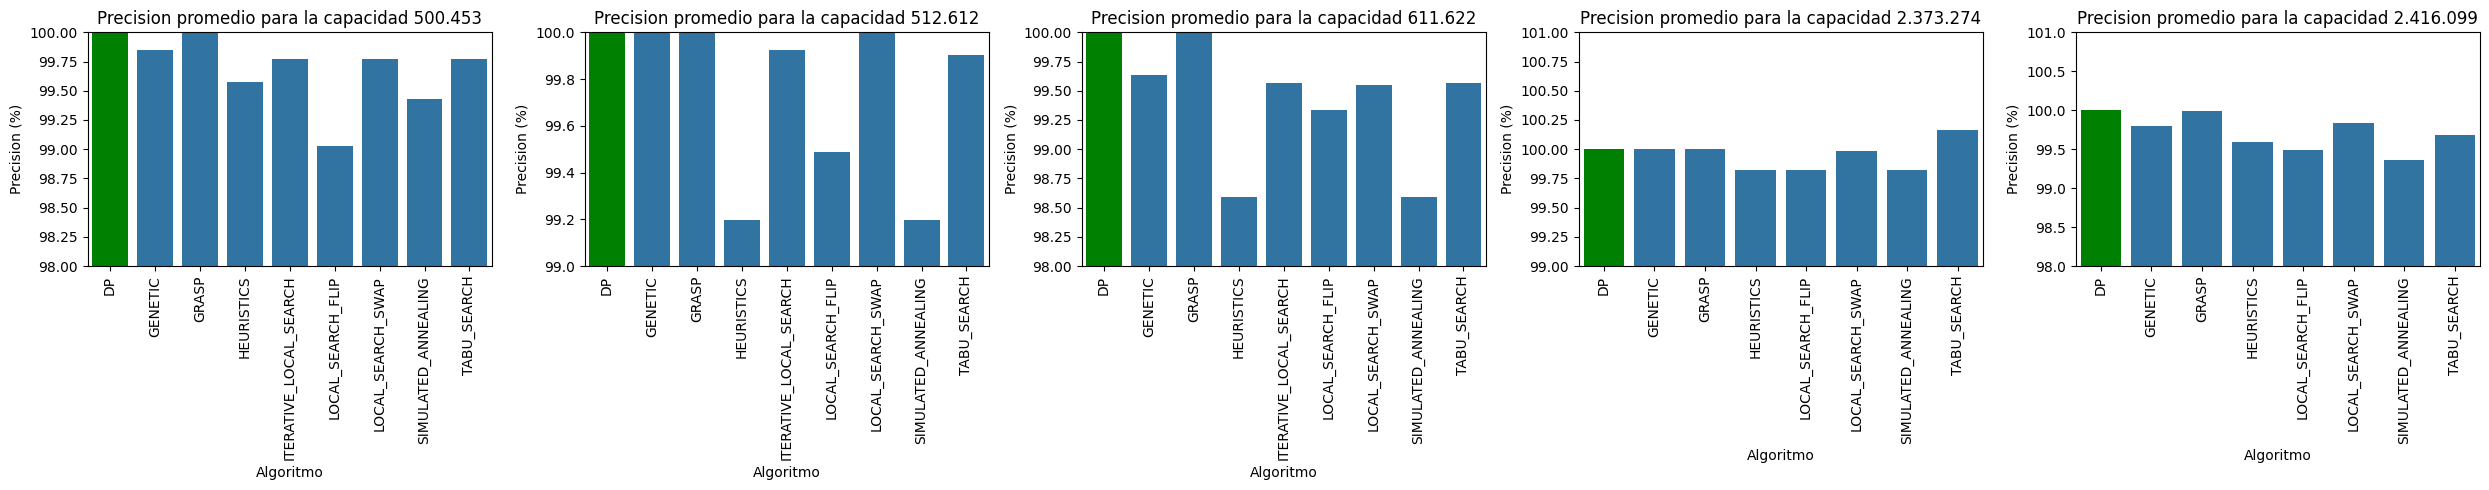

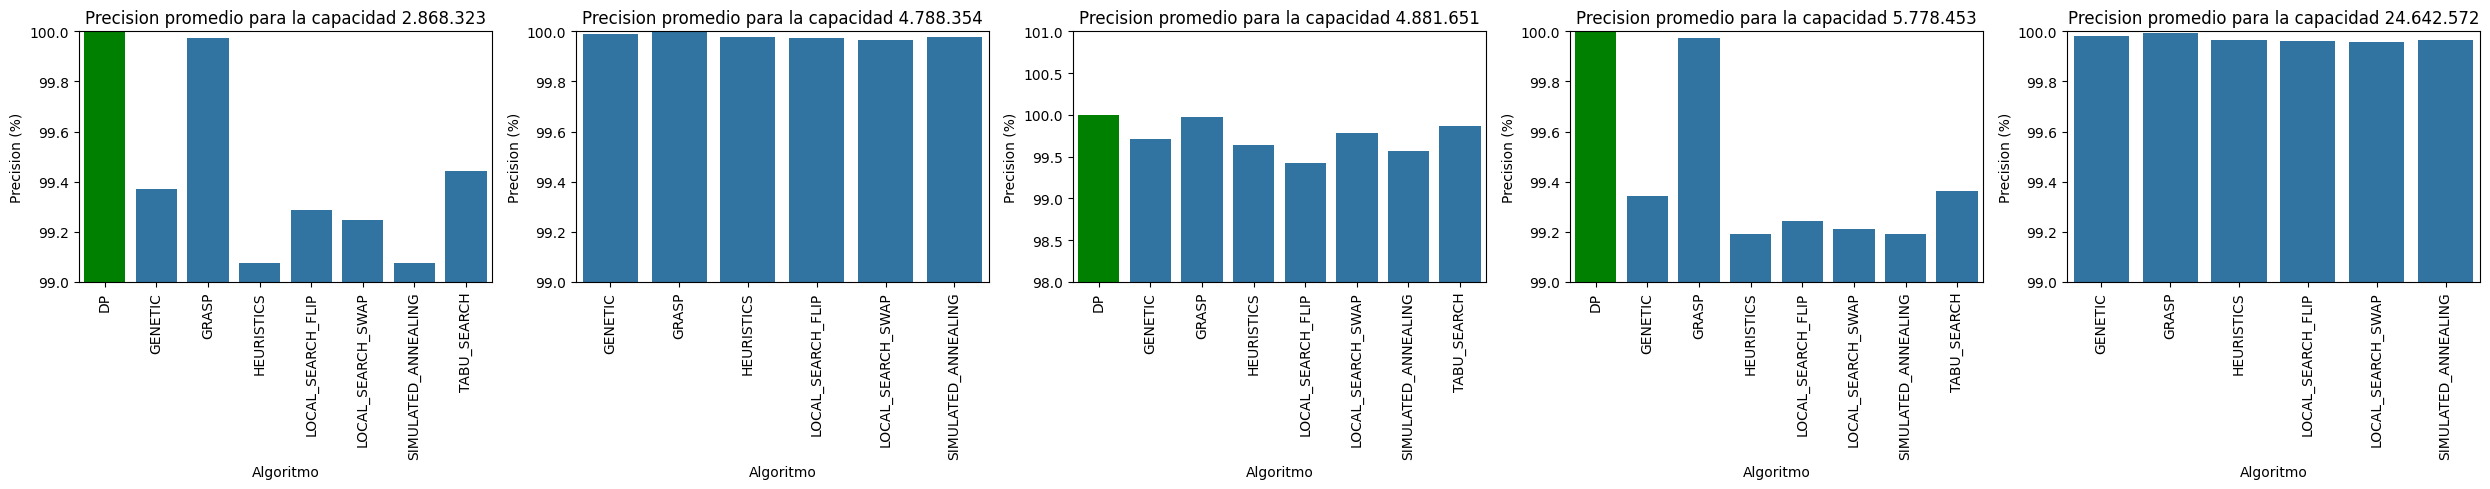

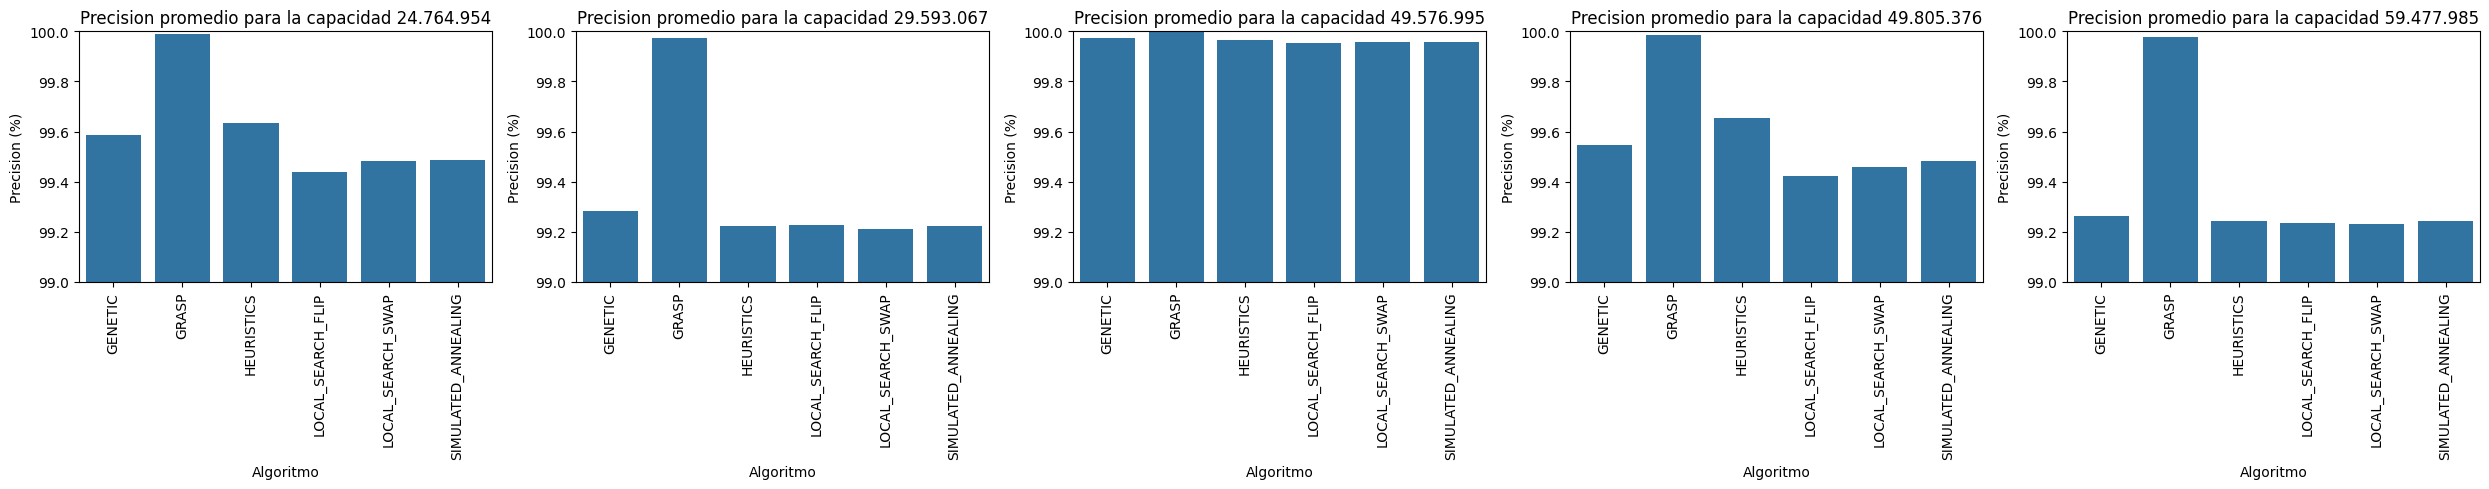

In [25]:
plot_algorithms(df, capacities1, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)
plot_algorithms(df, capacities2, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)
plot_algorithms(df, capacities3, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)